## K-Nearest Neighbour
### K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
### K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
### K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
### K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
### K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
### It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
### KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

## How does KNN works
### Step-1: Select the number K of the neighbors
### Step-2: Calculate the Euclidean distance of K number of neighbors
### Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
### Step-4: Among these k neighbors, count the number of the data points in each category.
### Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
### Step-6: Our model is ready.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification

In [32]:
X,y=make_classification(n_samples=1000,n_features=3,n_informative=2,n_redundant=1,n_classes=2)

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='0', ylabel='1'>

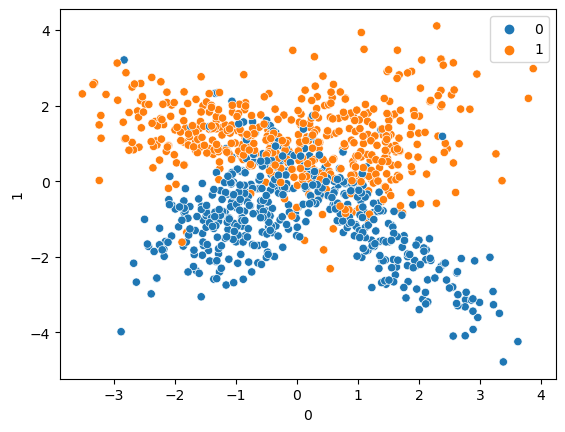

In [33]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [34]:
y_test,y_pred## train_trst_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KC=KNeighborsClassifier()
KC.fit(X_train,y_train)
y_pred=KC.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.87


In [38]:
param=dict(n_neighbors=[4,5,6,7],weights=['uniform','distance'],p=[1,2],algorithm=['ball_tree','kd_tree','brute'])

In [39]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=KC,param_grid=param,n_jobs=-1)

In [40]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [41]:
y_pred1=grid.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred1)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(score)

[[127  18]
 [ 21 134]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       145
           1       0.88      0.86      0.87       155

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300

0.8733333333333333


In [45]:
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}